Customer Churn prediction using machine learning 

Business Understanding

Customer churn refers to the loss of customers or subscribers for any reason at all. A high churn rate means you are not able to retain customers; therefore, loyalty to your service is low. The telecommunications industry is particularly competitive and characterized by very high churn rates. While companies fiercely compete for customers, market share, and long-term survival, customers tend to switch operators repeatedly due to the lower financial costs associated with switching service providers. Considering that attracting new customers is both difficult and expensive, it is suggested that retaining the most valuable existing customers, and hence avoiding churn, should be given a higher priority than trying to attract new customers. 

Problem statement

details on the data set
description of columns
state: The state where the customer resides.
phone number: The phone number of the customer.
international plan: Whether the customer has an international plan (Yes or No).
voice mail plan: Whether the customer has a voice mail plan (Yes or No).
area code: The area code associated with the customer's phone number.
account length: The number of days the customer has been an account holder.
number vmail messages: The number of voice mail messages received by the customer.
total day minutes: The total number of minutes the customer used during the day.
total day calls: The total number of calls made by the customer during the day.
total day charge: The total charges incurred by the customer for daytime usage.
total eve minutes: The total number of minutes the customer used during the evening.
total eve calls: The total number of calls made by the customer during the evening.
total eve charge: The total charges incurred by the customer for evening usage.
total night minutes: The total number of minutes the customer used during the night.
total night calls: The total number of calls made by the customer during the night.
total night charge: The total charges incurred by the customer for nighttime usage.
total intl minutes: The total number of international minutes used by the customer.
total intl calls: The total number of international calls made by the customer.
total intl charge: The total charges incurred by the customer for international usage.
customer service calls: The number of customer service calls made by the customer.
Churn: true if the customer cancelled their contract, otherwise false


In [157]:
#import the necessary libraries
# Importing packages for data manipulation
import pandas as pd
import numpy as np

# Importing packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing packages for modeling and algorithms for supervised learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

In [86]:
# Load the CSV data into a Pandas DataFrame
df = pd.read_csv('customer.churn.csv')

# Display the first 5 rows of the DataFrame
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [87]:
#check the number of rows and columns
number_rows, number_columns = df.shape

print(f"Number of Rows: {number_rows}")
print(f"Number of Columns: {number_columns}")

Number of Rows: 3333
Number of Columns: 21


In [88]:
#check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [89]:
#identify the numeric and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')
Categorical columns: Index(['state', 'phone number', 'international plan', 'voice mail plan',
       'churn'],
      dtype='object')


The dataset comprises 21 columns with a total of 3333 entries.There are no null values present. The data types in the dataset are diverse and include:8 columns with floats,8 columns with integers,4 columns with object (text) data types,and 1 column with boolean values.

Data cleaning 
This process of identifying and correcting or removing errors, inaccuracies, and inconsistencies in datasets such as missing values and duplicates

In [90]:
#check for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [91]:
#check for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool

In [92]:
# Convert area code which is an  integer column to an object  column
df['area code'].astype(str)

0       415
1       415
2       415
3       408
4       415
       ... 
3328    415
3329    415
3330    510
3331    510
3332    415
Name: area code, Length: 3333, dtype: object

In [93]:
#drop phone number column as its unique
df.drop('phone number', axis=1, inplace=True)


In [94]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


There are no null values nor duplicates within the dataframe.The phone number column has been dropped as it does not contribute to our machine learning models

statistical analysis


In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


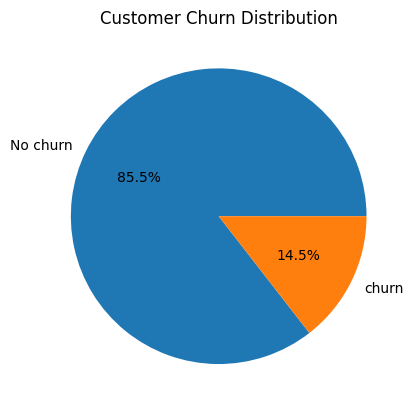

In [96]:
plt.pie(df['churn'].value_counts(),
        autopct='%.1f%%',
        labels=['No churn','churn'])
plt.title('Customer Churn Distribution')
plt.show()

From the chart:
85.5% of customers did not churn (represented by the blue section), meaning they continued to use the product or service.
14.5% of customers did churn (represented by the orange section), meaning they stopped using the product or service.This is a significant imbalance, as the majority class (No churn) is much larger than the minority class (Churn). This could potentially lead to a machine learning model being more biased towards predicting the majority class, as it has more data to learn from.

Text(0, 0.5, 'State')

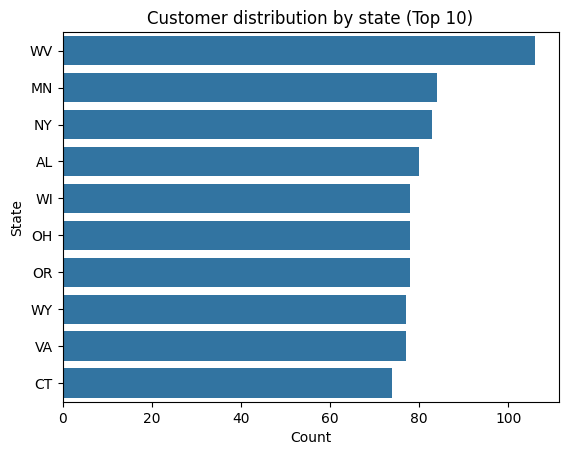

In [97]:
# Set the figure size
plt.figure()

# Get the counts of the 'state' column and select the first 10
top_10_states = df['state'].value_counts().index[:10]

# Create the countplot for only the first 10 states
sns.countplot(y='state', data=df, order=top_10_states)

# Set the title and labels
plt.title('Customer distribution by state (Top 10)')
plt.xlabel('Count')
plt.ylabel('State')



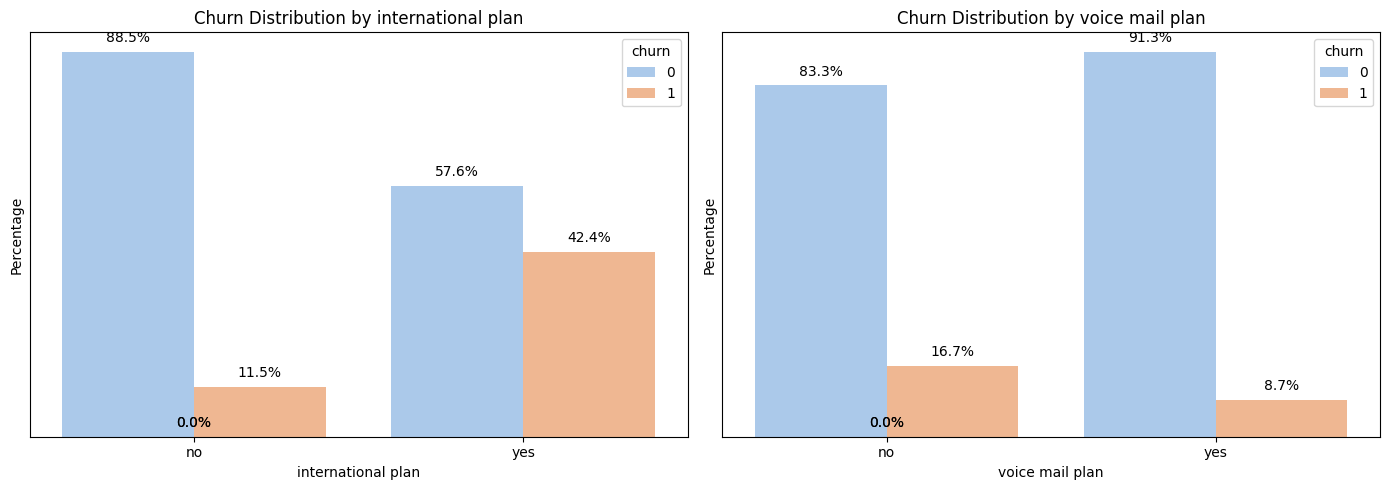

In [169]:

# Specify other categorical columns
categorical_columns = ['international plan', 'voice mail plan']

# Set the figure size for all plots
plt.figure(figsize=(14, 5))

# Plot countplots for churn based on other categorical columns
for idx, column in enumerate(categorical_columns, 1):
    plt.subplot(1, len(categorical_columns), idx)
    
    # Calculate the percentage
    churn_percentage = df.groupby(column)['churn'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
    
    # Plot the countplot
    sns.barplot(x=column, y='percentage', hue='churn', data=churn_percentage, palette='pastel')
    
    # Add percentages on top of the bars
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)
    
    plt.title(f'Churn Distribution by {column}')
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.yticks([])
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()




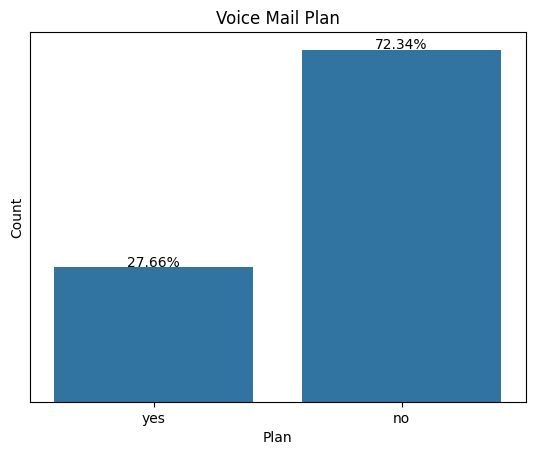

In [153]:

# Create the countplot
ax = sns.countplot(x='voice mail plan', data=df)

# Calculate the percentages and annotate the bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total*100) + '%',
            ha="center") 

# Set the title and labels
plt.title('Voice Mail Plan')
plt.xlabel('Plan')
plt.ylabel('Count')
plt.yticks([])
# Show the plot
plt.show()




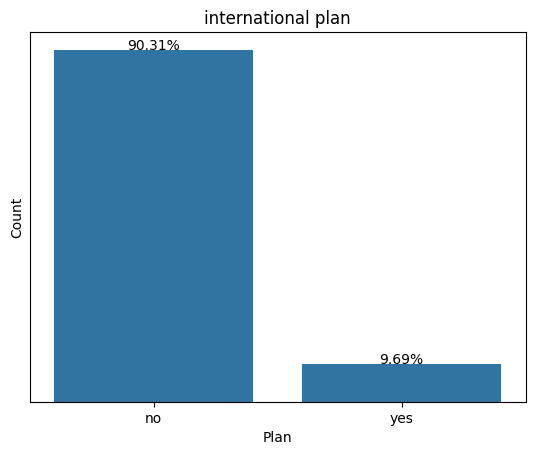

In [100]:
# Create the countplot
ax = sns.countplot(x='international plan', data=df)

# Calculate the percentages and annotate the bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total*100) + '%',
            ha="center") 

# Set the title and labels
plt.title('international plan')
plt.xlabel('Plan')
plt.ylabel('Count')
plt.yticks([])
# Show the plot
plt.show()



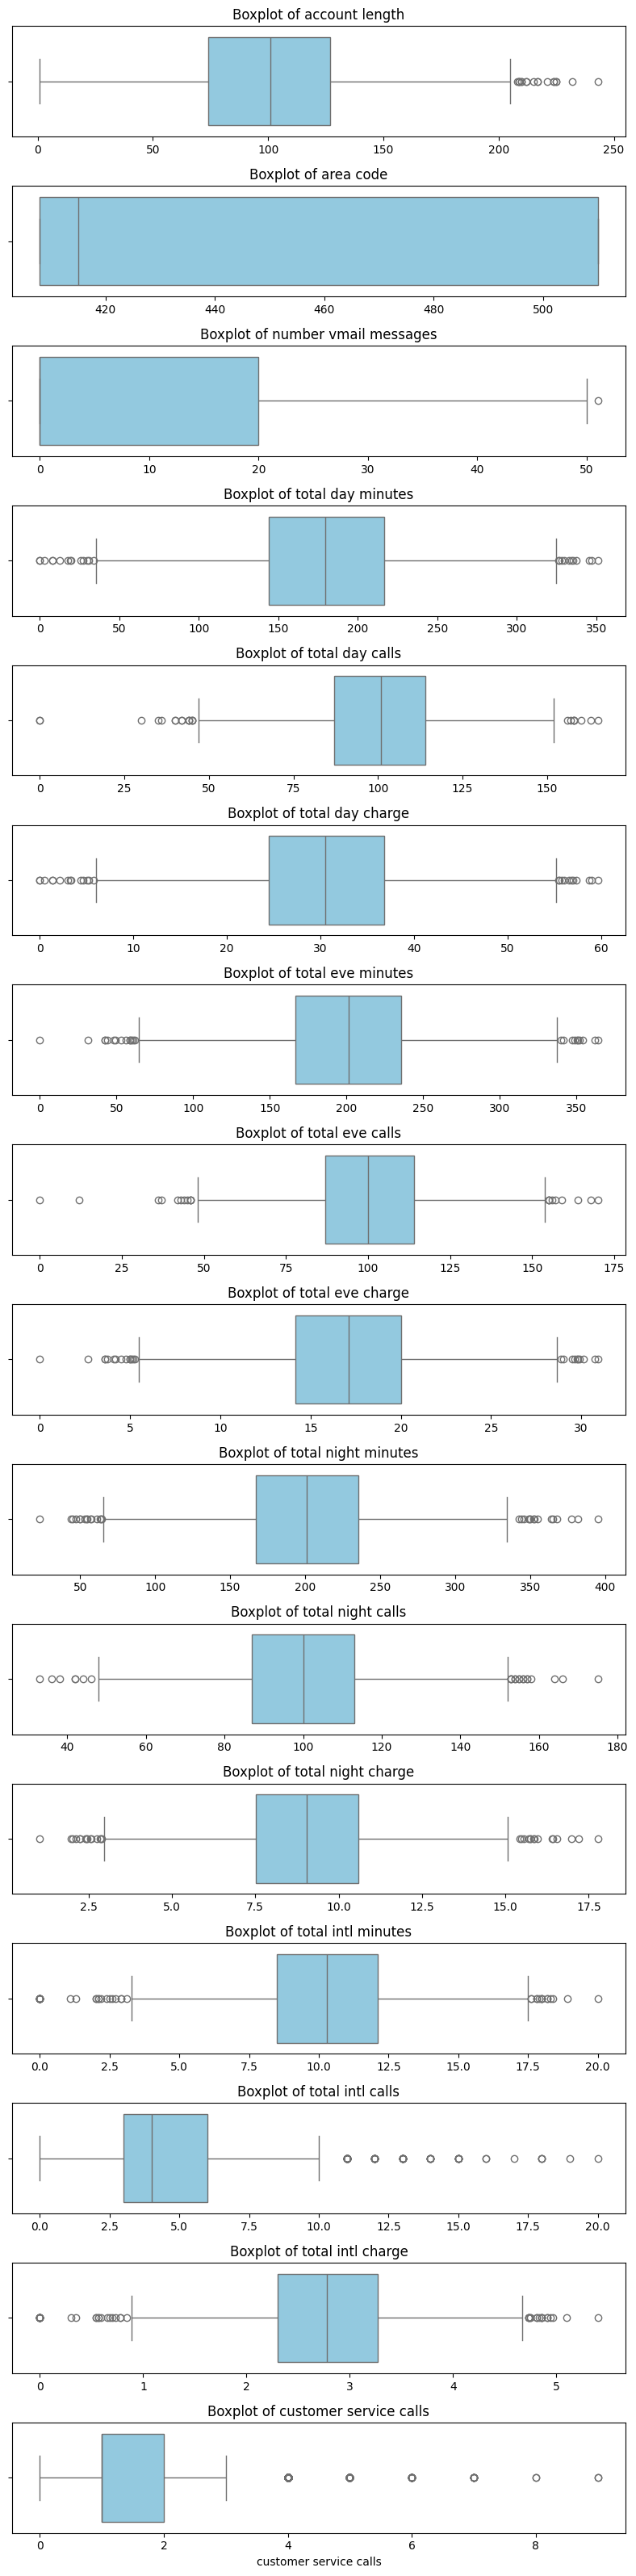

In [182]:

import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
num_cols = ['account length', 'area code', 'number vmail messages',
            'total day minutes', 'total day calls', 'total day charge',
            'total eve minutes', 'total eve calls', 'total eve charge',
            'total night minutes', 'total night calls', 'total night charge',
            'total intl minutes', 'total intl calls', 'total intl charge',
            'customer service calls']

# Create subplots for each column
fig, axs = plt.subplots(nrows=len(num_cols), figsize=(8, 2*len(num_cols)))

for i, col in enumerate(num_cols):
    # Create a boxplot for each column
    sns.boxplot(x=col, data=df, ax=axs[i], color='skyblue')
    
    # Remove x-axis label for all but the last subplot
    if i < len(num_cols) - 1:
        axs[i].set_xlabel('')
    
    # Add a title to each subplot
    axs[i].set_title('Boxplot of ' + col)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()




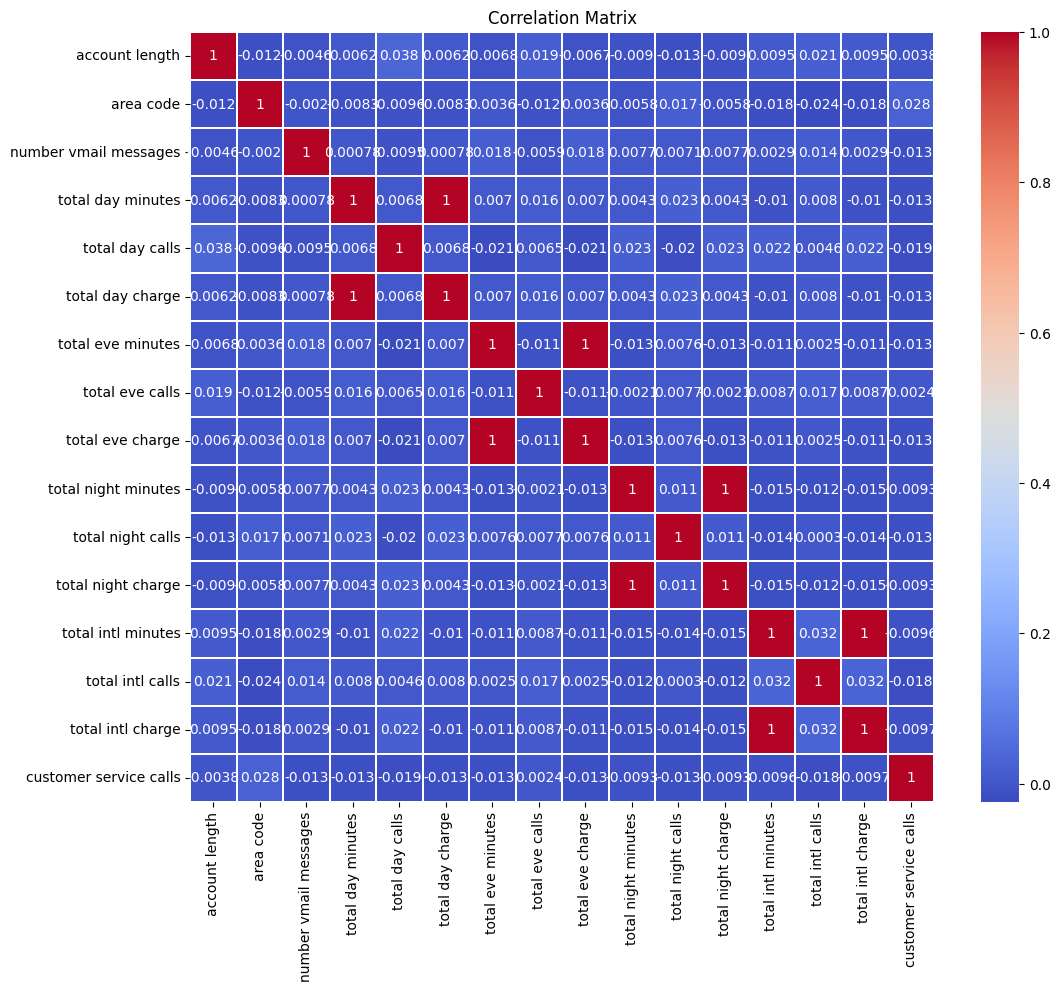

In [173]:

# Select only numeric columns for the correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.2)

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()




From the heatmap, its observed that the following pairs of variables are positively correlated, as indicated by the bright red color:
Total Day Minutes and Total Day Charge: This suggests that as the total day minutes increase, the total day charge also increases.
Total Eve Minutes and Total Eve Charge: This suggests that as the total evening minutes increase, the total evening charge also increases.
Total Night Minutes and Total Night Charge: This suggests that as the total night minutes increase, the total night charge also increases.
Total Intl Minutes and Total Intl Charge: This suggests that as the total international minutes increase, the total international charge also increases.
These positive correlations make sense as the charges are likely based on the number of minutes for day, evening, night, and international calls

Data preprocessing for machine learning

Transforming Categorical Columns to Numerical

In [111]:
#convert churn values to integer 1s and 0s
df['churn'] = df['churn'].astype(int)


In [139]:
# Specify the categorical columns
categorical_columns = ['state', 'international plan','area code', 'voice mail plan']

# Use one-hot encoding for the specified columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

Splitting the Dataset

In [141]:
# Data preprocessing
X = df_encoded.drop(columns=['churn'])  # Exclude 'churn' 
y = df_encoded['churn']

In [142]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling: The features in the training and testing sets are scaled using the StandardScaler. This ensures that all features have a similar scale, which is important for many machine learning algorithms.

In [143]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

SMOTE (Synthetic Minority Over-sampling Technique)
SMOTE is used to balance the classes in the training set. This is done by creating synthetic samples of the minority class (in this case, ‘churn’) until the minority class has the same number of samples as the majority class. This can help improve the performance of the model on the minority class.

In [144]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [175]:
# Train Logistic Regression model
baseline_model = LogisticRegression()
baseline_model.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred = baseline_model.predict(X_test_scaled)

# Calculate accuracy scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"roc_auc_score: {f1}")

Accuracy: 0.7886056971514243
Precision: 0.39361702127659576
Recall: 0.7326732673267327
F1 Score: 0.5121107266435986
roc_auc_score: 0.5121107266435986


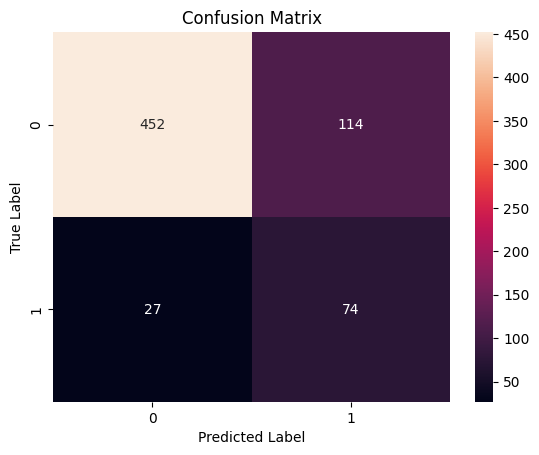

In [176]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure()
sns.heatmap(cnf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [146]:

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Calculate accuracy scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"roc_auc_score: {f1}")

Accuracy: 0.9220389805097451
Precision: 0.7578947368421053
Recall: 0.7128712871287128
F1 Score: 0.7346938775510204
roc_auc_score: 0.7346938775510204


In [147]:
# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting Machine": GradientBoostingClassifier(),
}

results = {}

# Iterate over models
for name, model in models.items():
    # Create pipeline with preprocessing and model
    clf = Pipeline(steps=[('classifier', model)])
    # Train the model
    clf.fit(X_train_smote, y_train_smote)
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    # Store results
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC-AUC': roc_auc}

# Display results
results_df = pd.DataFrame.from_dict(results, orient='index')
print(results_df)


                           Accuracy  Precision    Recall  F1 Score   ROC-AUC
Decision Tree              0.893553   0.633929  0.702970  0.666667  0.815266
Gradient Boosting Machine  0.941529   0.869048  0.722772  0.789189  0.851669


model tuning 

In [150]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 2, 3, 4, 5],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
}

# Create pipeline with preprocessing and model
clf = Pipeline(steps=[('classifier', RandomForestClassifier(random_state=42))])

# Create GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the model and tune parameters
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
clf.set_params(**best_params)
clf.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")
print(f"Best Params: {best_params}")


Accuracy: 0.9310344827586207
Precision: 0.7835051546391752
Recall: 0.7524752475247525
F1 Score: 0.7676767676767676
ROC-AUC Score: 0.8576863870132596
Best Params: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}


In [149]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'Decision Tree': {
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [None, 2, 3, 4, 5],
    },
    'Gradient Boosting Machine': {
        'classifier__learning_rate': [0.1, 0.01, 0.001],
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [3, 4, 5],
    },
}

# Iterate over models
for name, model in models.items():
    # Create pipeline with preprocessing and model
    clf = Pipeline(steps=[('classifier', model)])
    
    # Create GridSearchCV object
    grid_search = GridSearchCV(clf, param_grid[name], cv=5, scoring='accuracy')
    
    # Fit the model and tune parameters
    grid_search.fit(X_train_smote, y_train_smote)
    
    # Get the best parameters
    best_params = grid_search.best_params_
    
    # Train the model with the best parameters
    clf.set_params(**best_params)
    clf.fit(X_train_smote, y_train_smote)
    
    # Make predictions
    y_pred = clf.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Store results
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC-AUC': roc_auc, 'Best Params': best_params}

# Display results
results_df = pd.DataFrame.from_dict(results, orient='index')
print(results_df)


                           Accuracy  Precision    Recall  F1 Score   ROC-AUC  \
Decision Tree              0.895052   0.628099  0.752475  0.684685  0.836485   
Gradient Boosting Machine  0.944528   0.855556  0.762376  0.806283  0.869704   

                                                                 Best Params  
Decision Tree              {'classifier__criterion': 'entropy', 'classifi...  
Gradient Boosting Machine  {'classifier__learning_rate': 0.1, 'classifier...  
